## **Conv2D layer**



```
tf.keras.layers.Conv2D(
    filters,
    kernel_size,
    strides=(1, 1),
    padding='valid',
    activation=None,
    use_bias=True,
    kernel_initializer='glorot_uniform',
    bias_initializer='zeros',
    kernel_regularizer=None,
    bias_regularizer=None,
    kernel_constraint=None,
    bias_constraint=None,
)
```
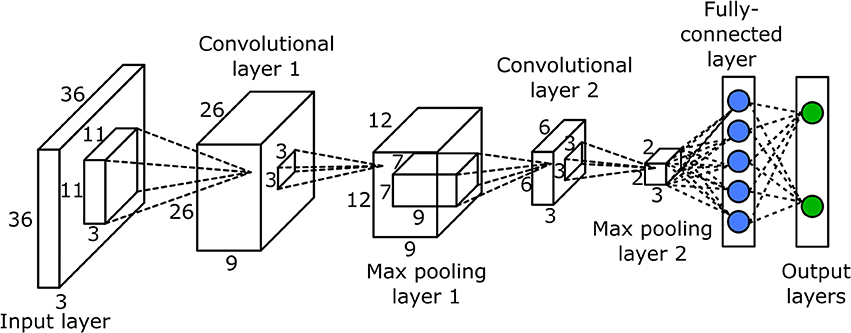



### **Difference between padding="valid" and "same"**

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [2]:

model = keras.Sequential(
    [
     keras.Input(shape=(32, 32, 3)),
     layers.Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu'),
     layers.Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'),
     layers.Flatten(),
     layers.Dense(64, activation='relu'),
     layers.Dense(10, activation='softmax')   
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 flatten (Flatten)           (None, 65536)             0         
                                                                 
 dense (Dense)               (None, 64)                4194368   
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                                 
Total params: 4,214,410
Trainable params: 4,214,410
Non-trainable params: 0
_________________________________________________________________


In [3]:
model = keras.Sequential(
    [
     keras.Input(shape=(32, 32, 3)),
     layers.Conv2D(filters=32, kernel_size=(3,3), padding='valid', activation='relu'),
     layers.Conv2D(filters=64, kernel_size=(3,3), padding='valid', activation='relu'),
     layers.Flatten(),
     layers.Dense(64, activation='relu'),
     layers.Dense(10, activation='softmax')   
    ]
)

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 conv2d_3 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 flatten_1 (Flatten)         (None, 50176)             0         
                                                                 
 dense_2 (Dense)             (None, 64)                3211328   
                                                                 
 dense_3 (Dense)             (None, 10)                650       
                                                                 
Total params: 3,231,370
Trainable params: 3,231,370
Non-trainable params: 0
_________________________________________________________________


https://setosa.io/ev/image-kernels/

### **Different ways to build tensorflow models**

*   **The Sequential model**: used for simple models and it's limited to simple stacks of layers.
*   **The Functional API**: can be used for graph-like model architectures and gives more flexibility for models with multiple inputs and outputs.




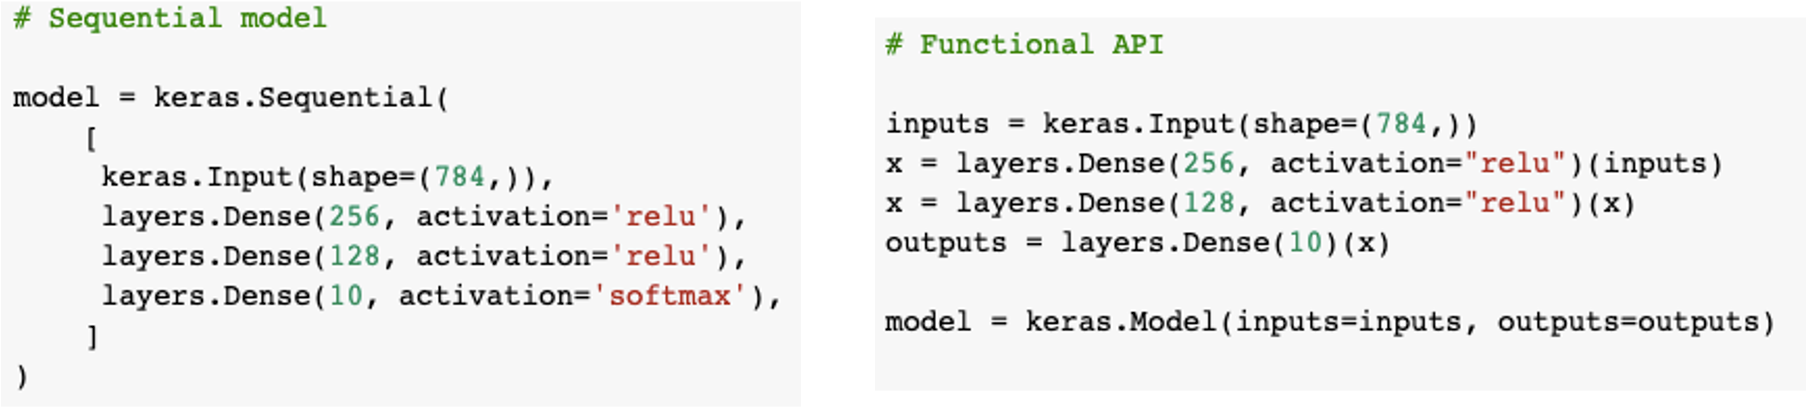

### **Working with tensorflow datasets**

In [2]:
import tensorflow_datasets as tfds

In [3]:
(train_ds, val_ds, test_ds), metadata = tfds.load(
    'cats_vs_dogs',
    split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'],
    shuffle_files = True,
    with_info=True,
    as_supervised=True,
)

print(metadata)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/23262 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/cats_vs_dogs/4.0.0.incompleteK40SU6/cats_vs_dogs-train.tfrecord*...:   0%|    …

Dataset cats_vs_dogs downloaded and prepared to ~/tensorflow_datasets/cats_vs_dogs/4.0.0. Subsequent calls will reuse this data.
tfds.core.DatasetInfo(
    name='cats_vs_dogs',
    full_name='cats_vs_dogs/4.0.0',
    description="""
    A large set of images of cats and dogs. There are 1738 corrupted images that are dropped.
    """,
    homepage='https://www.microsoft.com/en-us/download/details.aspx?id=54765',
    data_path='~/tensorflow_datasets/cats_vs_dogs/4.0.0',
    file_format=tfrecord,
    download_size=786.67 MiB,
    dataset_size=689.64 MiB,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=tf.uint8),
        'image/filename': Text(shape=(), dtype=tf.string),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'train': <SplitInfo num_examples=23262, num_shards=8>,
    },
    citation="""@Inproceedings (Conference){asirra-a-captcha-t

In [4]:
len(train_ds), len(val_ds), len(test_ds)

(18610, 2326, 2326)

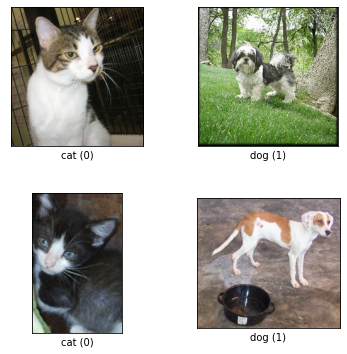

In [7]:
fig = tfds.show_examples(train_ds, metadata, rows=2, cols=2)

In [11]:
for X, y in train_ds:
  print(X.shape, y.numpy())
  image = X.numpy()
  break

(500, 306, 3) 1


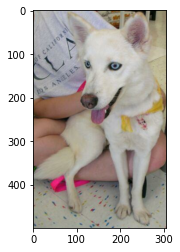

In [12]:
import matplotlib.pyplot as plt

plt.imshow(image)

### **Data Augmentation**

In [13]:
def visualize(original, augmented):
  fig = plt.figure()
  plt.subplot(1,2,1)
  plt.title('Original image')
  plt.imshow(original)

  plt.subplot(1,2,2)
  plt.title('Augmented image')
  plt.imshow(augmented)

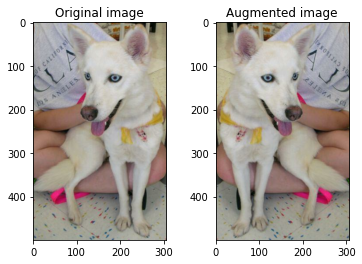

In [14]:
flipped = tf.image.flip_left_right(image)
visualize(image, flipped)

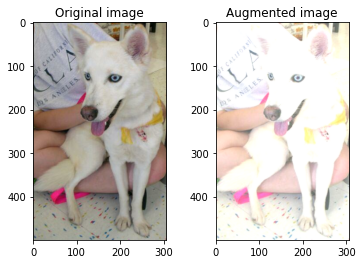

In [15]:
bright = tf.image.adjust_brightness(image, 0.4)
visualize(image, bright)

In [5]:
def normalize_img(image, label):
  return (tf.cast(image, tf.float32) / 255.0, label)

def resize_img(image, label):
  return (tf.image.resize(image, (224, 224)), label)
 
def augment(image, label):
  image = tf.image.random_flip_left_right(image)
  return image, label

In [6]:
# Training Dataset
train_ds = train_ds.map(resize_img, num_parallel_calls=tf.data.AUTOTUNE)
train_ds = train_ds.map(normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
train_ds = train_ds.map(augment, num_parallel_calls=tf.data.AUTOTUNE)
SHUFFLE_VAL = len(train_ds) // 1000
train_ds = train_ds.shuffle(SHUFFLE_VAL)
BATCH_SIZE = 32
train_ds = train_ds.batch(BATCH_SIZE)

train_ds = train_ds.prefetch(tf.data.AUTOTUNE) # this allows later elements to be prepared while the current element is being processed.
                                               # this often improves latency and throughput, at the cost of using additional memory to store prefetched elements.

In [7]:
# Validation Dataset
val_ds = val_ds.map(resize_img, num_parallel_calls=tf.data.AUTOTUNE)
val_ds = val_ds.map(normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
val_ds = val_ds.batch(BATCH_SIZE)

val_ds = val_ds.prefetch(tf.data.AUTOTUNE)

In [8]:
# Test Dataset
test_ds = test_ds.map(resize_img, num_parallel_calls=tf.data.AUTOTUNE)
test_ds = test_ds.map(normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
test_ds = test_ds.batch(BATCH_SIZE)

test_ds = test_ds.prefetch(tf.data.AUTOTUNE)

## **AlexNet**


*   Alexnet won ImageNet competition in 2012
*   Key modifications

>   Dropout (regularization) 

>   ReLu and MaxPooling (training)

## **Architecture**
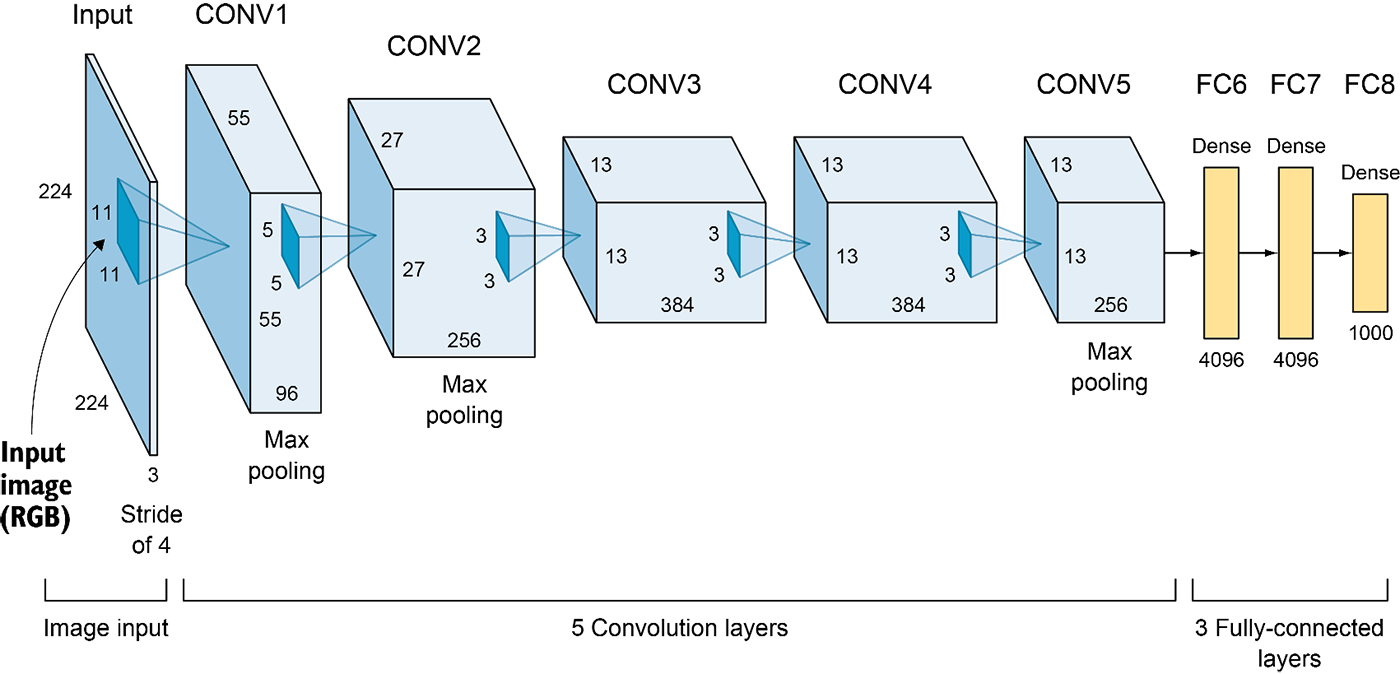














In [9]:
from tensorflow.keras import layers
from tensorflow.keras.models import Model


inp = layers.Input((224, 224, 3))
x = layers.Conv2D(96, 11, 4, activation='relu')(inp)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D(3, 2)(x)
x = layers.Conv2D(256, 5, 1, activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D(3, 2)(x)
x = layers.Conv2D(384, 3, 1, activation='relu')(x)
x = layers.Conv2D(384, 3, 1, activation='relu')(x)
x = layers.Conv2D(256, 3, 1, activation='relu')(x)
x = layers.MaxPooling2D(3, 2)(x)
x = layers.Flatten()(x)
x = layers.Dense(4096, activation='relu')(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(4096, activation='relu')(x)
x = layers.Dropout(0.5)(x)
out = layers.Dense(1, activation='sigmoid')(x)

Alexnet_model = Model(inputs = inp, outputs = out)

Alexnet_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 54, 54, 96)        34944     
                                                                 
 batch_normalization (BatchN  (None, 54, 54, 96)       384       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 26, 26, 96)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 256)       614656    
                                                                 
 batch_normalization_1 (Batc  (None, 22, 22, 256)      1024  

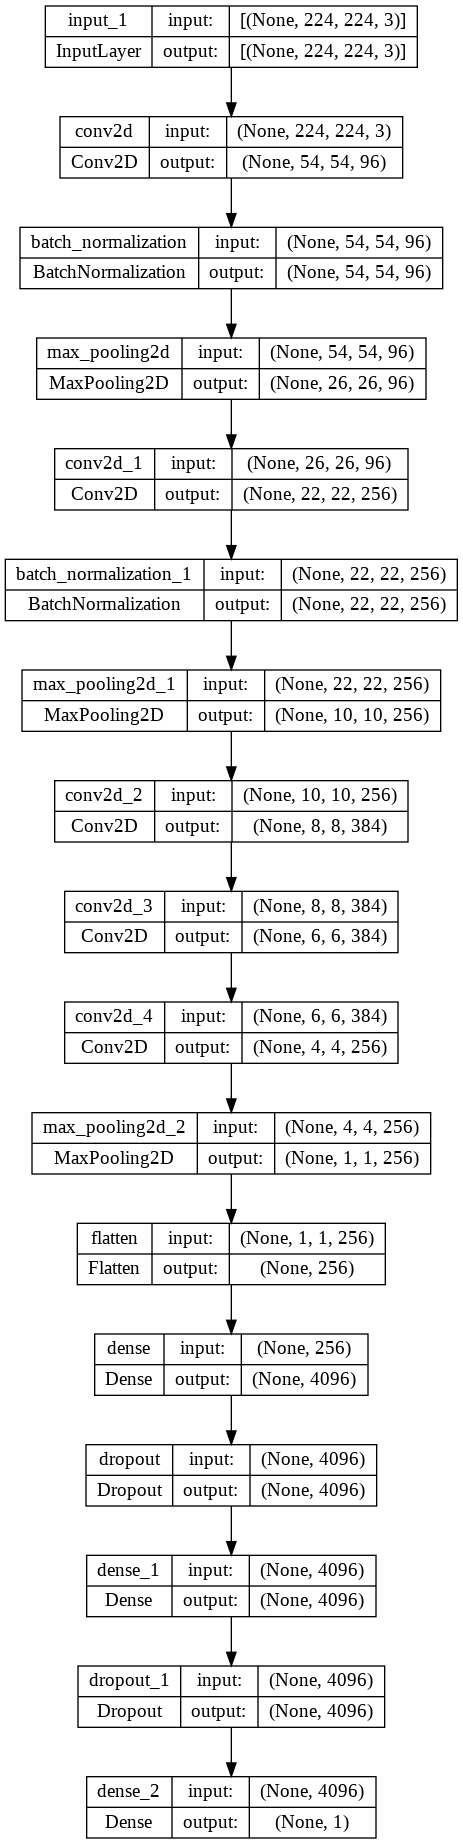

In [10]:
tf.keras.utils.plot_model(Alexnet_model, show_shapes=True)

In [13]:
from tensorflow import keras

Alexnet_model.compile(loss=keras.losses.BinaryCrossentropy(),
              optimizer=keras.optimizers.Adam(learning_rate=0.01), metrics=['accuracy'])

In [14]:
history = Alexnet_model.fit(train_ds, epochs=5, validation_data=val_ds)

Epoch 1/5
582/582 [==============================] - 40s 67ms/step - loss: 0.6940 - accuracy: 0.5018 - val_loss: 0.6938 - val_accuracy: 0.4815
Epoch 2/5
582/582 [==============================] - 38s 65ms/step - loss: 0.6933 - accuracy: 0.5056 - val_loss: 0.6937 - val_accuracy: 0.4815
Epoch 3/5
582/582 [==============================] - 39s 66ms/step - loss: 0.6933 - accuracy: 0.5054 - val_loss: 0.6937 - val_accuracy: 0.4815
Epoch 4/5
582/582 [==============================] - 38s 65ms/step - loss: 0.6933 - accuracy: 0.5061 - val_loss: 0.6937 - val_accuracy: 0.4815
Epoch 5/5
582/582 [==============================] - 39s 67ms/step - loss: 0.6933 - accuracy: 0.5034 - val_loss: 0.6937 - val_accuracy: 0.4815
